# Week 3 Exercise Notebook: Classification & Evaluation Metrics

In **Week 3**, we’re exploring **more classification** concepts and **evaluation metrics** beyond simple accuracy. This exercise uses the **Wine** dataset from scikit-learn, a three-class classification problem representing different wine cultivars.

We'll:

1. **Load** & briefly explore the Wine dataset.
2. **Train** a classification model (e.g. `LogisticRegression` or `RandomForest`).
3. **Compute** advanced metrics: confusion matrix, precision, recall, F1, macro/micro averaging for multi-class.  
4. Discuss and attempt **class imbalance** techniques, though the Wine data is fairly balanced.  
5. Summarize the results with a short reflection.

**Instructions**: Some cells have partial code or placeholders (`TODO`). Fill them in to complete the tasks.

---
# Part 1

## 1. Imports & Setup


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, precision_score,
    recall_score, f1_score
)

warnings.simplefilter(action='ignore', category=FutureWarning)
random_state = 42

## 2. Load the Wine Dataset

The Wine dataset has:
- **178 samples** (rows)
- **13 features** (chemical analyses of wines)
- **3 classes** for the target (0, 1, 2) representing different wine cultivars.

Let’s load it, convert to a DataFrame for a quick look.


In [2]:
def load_wine_data():
    data = load_wine()
    X = data.data
    y = data.target
    feature_names = data.feature_names
    target_names = data.target_names
    
    df = pd.DataFrame(X, columns=feature_names)
    df['target'] = y
    return df, feature_names, target_names

# Demo
if __name__ == "__main__":
    df_wine, feat_names, target_names = load_wine_data()
    display(df_wine.head())
    print("Unique classes in target:", df_wine['target'].unique())
    print("Target class names:", target_names)
    print(f'Count of rows for each class: \n{df_wine["target"].value_counts()}')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Unique classes in target: [0 1 2]
Target class names: ['class_0' 'class_1' 'class_2']
Count of rows for each class: 
target
1    71
0    59
2    48
Name: count, dtype: int64


## 3. Train/Test Split & Model Selection

We’ll define a function to:

1. Load data
2. Split into train/test (80/20)
3. Train a classification model of your choice (e.g., `LogisticRegression`, `RandomForestClassifier`, or `DecisionTree`)
4. Return `(model, X_test, y_test)`

### TODO
- Choose **one** classifier.
- Implement the training steps.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

def train_wine_model(df, test_size=0.2, random_state=42):

    # TODO: Split dataframe into X (features) and y (target)
    X = df.drop('target', axis=1).values # Get all columns except 'target'
    y = df['target'].values # Get 'target' column
    
    # TODO: do train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=random_state)
    
    # Choose a model to train:
    model = LogisticRegression(max_iter=500, random_state=random_state)
    # model = DecisionTreeClassifier(random_state=random_state)
    # model = RandomForestClassifier(random_state=random_state)
    
    # TODO: fit the model on (X_train, y_train)
    model.fit(X_train, y_train)
    
    return model, X_test, y_test

In [4]:
# Try out your function
df, feature_names, target_names = load_wine_data()
model, X_test, y_test = train_wine_model(df)

## 4. Evaluate Accuracy, Confusion Matrix, and Other Metrics

We’ll define `evaluate_model(model, X_test, y_test)`:

1. **Predict** on `X_test`
2. Print or compute:
   - Accuracy
   - Confusion Matrix (3x3, since it’s multi-class)
   - Precision, Recall, F1 for each class (or macro/micro averaged)
3. Possibly show a heatmap for the confusion matrix.

### TODO
- Fill in the placeholders. 

In [5]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # 1. Accuracy
    accuracy = np.mean(y_test == y_pred) # another way to compute accuracy than using accuracy_score
    
    # 2. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print or compute classification_report
    # Also demonstrate macro/micro averaging of precision, recall, F1
    class_report = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.3f}")
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", class_report)
    
    # Optionally do a heatmap
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    return accuracy, cm, class_report


## 5. Evaluating the model

Now for the metrics:

1. **Train** the model with `train_wine_model()`.
2. **Evaluate** with `evaluate_model(...)`. 

Feel free to experiment with different classifiers, or add custom code for hyperparameter tuning.

Accuracy: 1.000
Confusion Matrix:
 [[12  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



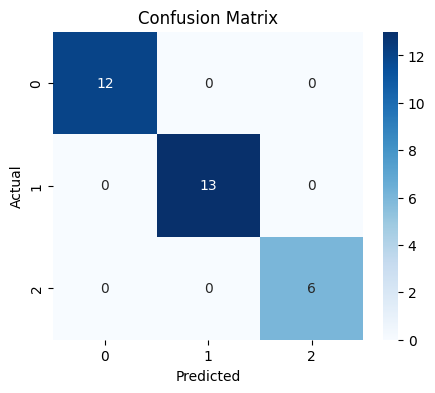

Weighted Accuracy: 1.000
Confusion Matrix:
 [[12  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [12]:
accuracy, cm, class_report = evaluate_model(model, X_test, y_test)

print(f"Weighted Accuracy: {accuracy:.3f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", class_report)

---
# Part 2:
## 6. Creating Class Imbalance

The Wine dataset is fairly balanced. Let’s artificially **remove** half of the samples belonging to class 2. This will reduce representation of class 2, simulating a real-world imbalance scenario.

### **Task**:
1. Implement the function below so that `class2` is partially removed.
2. Return the new DataFrame, now imbalanced.

In [17]:
def make_imbalanced(df):
    # Example: keep all class 0, class 1, but remove half of class 2
    class2_df = df[df['target'] == 2]
    class2_half = class2_df.sample(frac=0.2, random_state=42)
    df_imbalanced = df[df['target'] != 2].copy()
    df_imbalanced = pd.concat([df_imbalanced, class2_half], axis=0).reset_index(drop=True)
    return df_imbalanced

In [18]:
df_wine, feat_names, _ = load_wine_data()
df_imbal = make_imbalanced(df_wine)
print("After make_imbalanced:")
print(df_imbal['target'].value_counts())

After make_imbalanced:
target
1    71
0    59
2    10
Name: count, dtype: int64


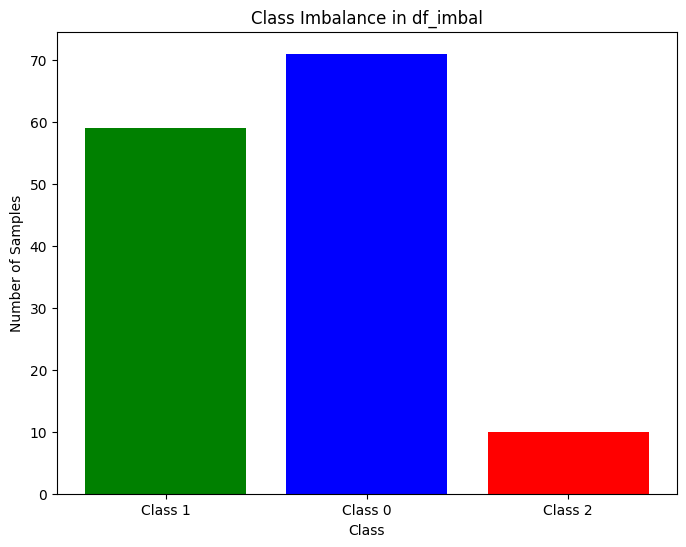

In [19]:
# Visualize the class imbalance
class_counts = df_imbal['target'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'green', 'red'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Imbalance in df_imbal')
plt.xticks(class_counts.index, ['Class 0', 'Class 1', 'Class 2'])
plt.show()

Now let's test how our previous model will fare with the above imbalanced dataset.


-- Baseline Model (no weighting) --
Accuracy: 0.929
Confusion Matrix:
 [[ 9  1  0]
 [ 0 15  0]
 [ 0  1  2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.88      1.00      0.94        15
           2       1.00      0.67      0.80         3

    accuracy                           0.93        28
   macro avg       0.96      0.86      0.89        28
weighted avg       0.94      0.93      0.93        28



C:\Users\23052058\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


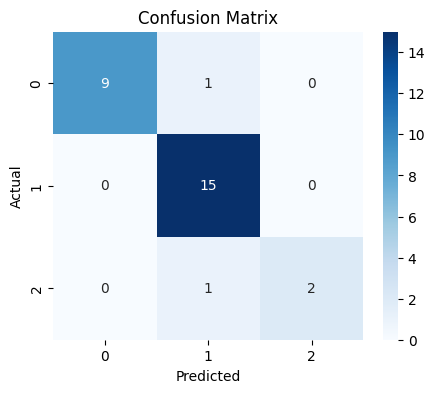

Weighted Accuracy: 0.929
Confusion Matrix:
 [[ 9  1  0]
 [ 0 15  0]
 [ 0  1  2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.88      1.00      0.94        15
           2       1.00      0.67      0.80         3

    accuracy                           0.93        28
   macro avg       0.96      0.86      0.89        28
weighted avg       0.94      0.93      0.93        28



In [20]:
print("\n-- Baseline Model (no weighting) --")
baseline_model, X_test, y_test = train_wine_model(df_imbal)

accuracy, cm, class_report = evaluate_model(baseline_model, X_test, y_test)
print(f"Weighted Accuracy: {accuracy:.3f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", class_report)

## 7. Handling Imbalance: Weighted Classifier

We can re-train a `LogisticRegression` with `class_weight='balanced'`. Let’s define `train_weighted_model()`. According to the docs for SKLearn's LogisticRegression method, the `class_weight='balanced'` will do the following:

> The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

`np.bincount(y)` gives 
> number of occurrences of each value in array of non-negative ints.

### **Task**:
1. Similar steps as baseline, but use `class_weight='balanced'` in the logistic regression constructor.
2. Print advanced metrics again.  

In [21]:
def train_weighted_model(df, test_size=0.2, random_state=42):
    X = df.drop('target', axis=1).values
    y = df['target'].values
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # TODO: logistic regression with class_weight='balanced'
    model = LogisticRegression(
        max_iter=500, random_state=random_state,
        class_weight='balanced'
    )
    model.fit(X_train, y_train)
    
    return model, X_test, y_test


-- Weighted Model --
Accuracy: 0.964
Confusion Matrix:
 [[ 9  1  0]
 [ 0 15  0]
 [ 0  0  3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00         3

    accuracy                           0.96        28
   macro avg       0.98      0.97      0.97        28
weighted avg       0.97      0.96      0.96        28



C:\Users\23052058\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


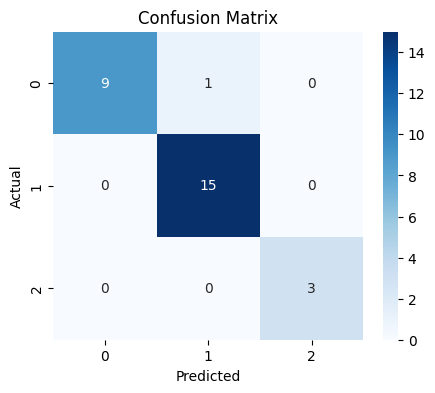

Weighted Accuracy: 0.964
Confusion Matrix:
 [[ 9  1  0]
 [ 0 15  0]
 [ 0  0  3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00         3

    accuracy                           0.96        28
   macro avg       0.98      0.97      0.97        28
weighted avg       0.97      0.96      0.96        28



In [22]:
print("\n-- Weighted Model --")
weighted_model, X_test, y_test = train_weighted_model(df_imbal)

accuracy, cm, class_report = evaluate_model(weighted_model, X_test, y_test)

print(f"Weighted Accuracy: {accuracy:.3f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", class_report)

## 8. Oversampling Approach

Instead of weighting, we can **oversample** the minority class. For a quick demonstration we will implement Naive random oversampling

### **Task**:
- Implement a function `oversample_minority(df)` that randomly duplicates the minority class (class 2) until we restore balance.  
- Then re-train a logistic regression (no weighting) to see if it helps.


In [23]:
def oversample_minority(df, minority_class=2, random_state=42):
    """
    Basic approach: replicate the minority class to match the largest class size.
    """
    # 1. find the largest class count
    class_counts = df['target'].value_counts()
    max_count = class_counts.max()
    
    # 2. separate minority class
    minority_df = df[df['target'] == minority_class]
    
    # rng = np.random.default_rng(random_state)
    # 3. repeatedly sample minority until we match max_count
    needed = max_count - len(minority_df)
    if needed <= 0:
        # no oversampling needed
        return df
    
    # sample with replacement
    minority_sample = minority_df.sample(n=needed, replace=True, random_state=random_state)
    oversampled_df = pd.concat([df, minority_sample], axis=0).reset_index(drop=True)
    return oversampled_df


-- Oversampled Approach --
Accuracy: 0.927
Confusion Matrix:
 [[ 8  0  0]
 [ 3 16  0]
 [ 0  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.84      0.91        19
           2       1.00      1.00      1.00        14

    accuracy                           0.93        41
   macro avg       0.91      0.95      0.92        41
weighted avg       0.95      0.93      0.93        41



C:\Users\23052058\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


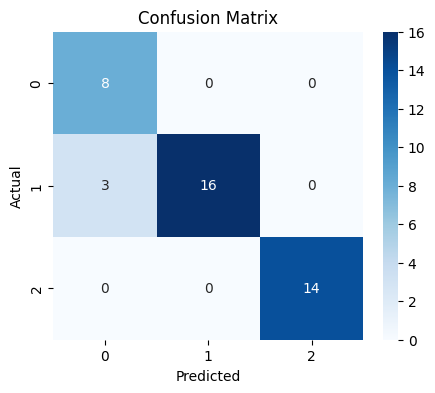

Oversampled approach Accuracy: 0.927
Confusion Matrix:
 [[ 8  0  0]
 [ 3 16  0]
 [ 0  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.84      0.91        19
           2       1.00      1.00      1.00        14

    accuracy                           0.93        41
   macro avg       0.91      0.95      0.92        41
weighted avg       0.95      0.93      0.93        41



In [24]:
df_os = oversample_minority(df, minority_class=2, random_state=random_state)

# Train a model on the oversampled data
print("\n-- Oversampled Approach --")
oversampled_model, X_test, y_test = train_wine_model(df_os)

accuracy, cm, class_report = evaluate_model(oversampled_model, X_test, y_test)
print(f"Oversampled approach Accuracy: {accuracy:.3f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", class_report)

## 9. Next Steps & Reflection

- Check which method best recovers **class 2** performance (compare recall for class 2 in the classification reports).  
- Possibly combine weighting + oversampling or try other classifiers (RandomForest, SVC).  

**End of Week 3 Exercises** – Enjoy exploring advanced classification metrics and class imbalance solutions!